
# <ins>"Выявление закономерностей, определяющих успешность игр"</ins>
___
В исходном файле представленна таблица, описывающая данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.
### Содержание
___
<a id='top'></a>
1. [Постановка задачи](#1)
2. [Общая информация о данных](#2)
3. [Предобработка данных](#3)
 * 3.1 [Обработка названий столбцов](#3.1)
 * 3.2 [Обработка пропусков и приведение данных к нужным типам](#3.2)
 * 3.3 [Проверка на дубликаты](#3.3)
 * 3.4 [Суммарные продажи](#3.4)
4. [Исследовательский анализ данных](#4)
 * 4.1 [Распределение количества выпущенных игр по годам](#4.1)
 * 4.2 [Изменение продаж по платформам](#4.2)
 * 4.3 [Потенциально прибыльные платформы](#4.3)
 * 4.4 [Диаграммы размаха по продажам игр](#4.4)
 * 4.5 [Зависимость продаж от оценок критиков и пользователей](#4.5)
 * 4.6 [Общее распределение игр по жанрам](#4.6)
5. [Составление портрета пользователя](#5)
 * 5.1 [ТОП-5 платформ](#5.1)
 * 5.2 [ТОП-5 жанров](#5.2)
 * 5.3 [Рейтинг ESRB](#5.3)
6. [Проверка гипотез](#6)
7. [Вывод](#7)

<a id='1'></a>

## 1. Постановка задачи
Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Необходимо отработать принцип работы с данными.

<a id='2'></a>

## 2. Общая информация о данных

In [55]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [56]:
pd.set_option('display.max_columns', 30)

In [57]:
# прочитаем файлы:

try:
    df = pd.read_csv("games.csv")
except:
    try:
        df = pd.read_csv("/datasets/games.csv")
    except:
        df = pd.read_csv("https://code.s3.yandex.net/datasets/games.csv")
        
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В качестве исходных данных предоставлена таблица, состоящая из 11 колонок и 16715 строк. Названия столбцов не в едином формате, типы данных некоторых колонок не соответствуют значениям, также есть пропуски, с которыми постараемся разобраться в предобработке данных.

<a id='3'></a>
<a id='3.1'></a>

## 3. Предобработка данных
### 3.1 Обработка названий столбцов

Приведем названия столбцов к нижнему регистру.

In [59]:
col_name_lower = df.columns.str.lower()

df.columns = col_name_lower
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<a id='3.2'></a>

### 3.2 Обработка пропусков и приведение данных к нужным типам

В *name* и *genre* всего по два пропуска:

In [60]:
df[df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Оказалась что пропуски у этих столбцов совпадают. Заполнить их как-либо мы не в силах, поэтому их лучше отбросить.

In [61]:
df = df.dropna(subset=['name'])

Пропусков в *year_of_release* не много - 1,6% всех данных. Заполнить их не прдставляется возможным, поэтому тоже их отбросим.

In [62]:
df = df.dropna(subset=['year_of_release'])

df['year_of_release'] = df['year_of_release'].astype('int')

Пропусков в столбцах *critic_score* и *user_score* очень много и заполнить их также не представляется возможным, как и удалить. Однако есть любопытные пропуски в *user_score* - 'tbd'.

In [63]:
df[df['user_score']=='tbd']['user_score']

119      tbd
301      tbd
520      tbd
645      tbd
718      tbd
        ... 
16695    tbd
16697    tbd
16698    tbd
16704    tbd
16706    tbd
Name: user_score, Length: 2376, dtype: object

Абревиатура 'tbd' (to be defined) означает, что данные скоро будут обнародованы. Для нас это все равно, что пропуск. Поэтому с помощью метода to_numeric приведем тип данных данного столбца к числовому и параллельно строки 'tbd' заменятся на NaN.

In [64]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

Пропуски в столбцах critic_score и user_score заменим на -1, чтобы в дальнейшем можно было проводить анализ.

In [65]:
df['critic_score'] = df['critic_score'].fillna(-1)

df['user_score'] = df['user_score'].fillna(-1)

А также заменим тип данных в колонке critic_score на целочисленный.

In [66]:
df['critic_score'] = df['critic_score'].astype('int')

В столбце rating заменим все пропуски на 'unknown', т.е. рейтинг неизвестный. Так сможем учесть эти данные при дальнейшем анализе.

In [67]:
df['rating'] = df['rating'].fillna('unknown')


<a id='3.3'></a>

### 3.3 Проверка на дубликаты

In [68]:
df.duplicated().sum()

0

Дубликаты отсутствуют.

<a id='3.4'></a>

### 3.4 Суммарные продажи

Добавим к исходной таблице столбец, в котором будет сумма продаж по всем регионам планеты для каждой игры.

In [69]:
#df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,unknown,31.38


<a id='4'></a>
<a id='4.1'></a>

## 4. Исследовательский анализ данных
### 4.1 Распределение количества выпущенных игр по годам

In [70]:
# с помощью сводной таблицы сгруппируем данные по годам и посчитаем количество выпущенных игр для каждого года

year_games_count = df.pivot_table(index='year_of_release', aggfunc={'name':'count'})
year_games_count.columns = ['counts_of_games']
year_games_count

,counts_of_games
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Text(0, 0.5, 'Количество игр')

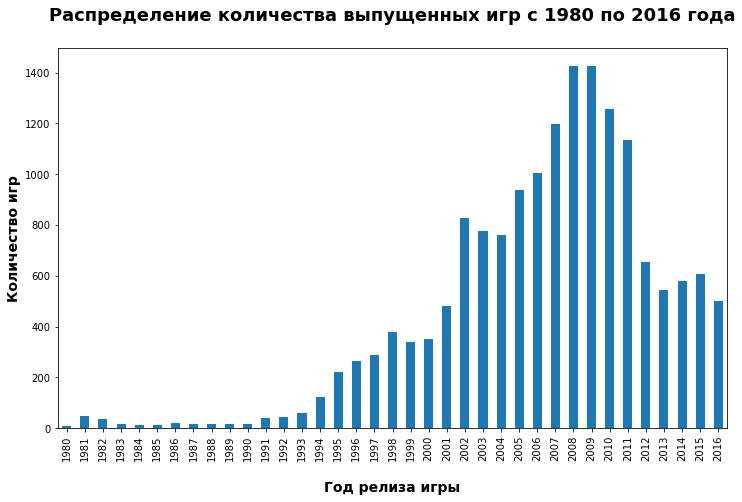

In [71]:
# построим график распределения количества выпущенных игр в течение интересующего нас отрезка времени

year_games_count.plot(y='counts_of_games', kind='bar', figsize=(12, 7), legend=False)

plt.title(label='Распределение количества выпущенных игр с 1980 по 2016 года\n', fontsize=18, fontweight="bold")
plt.xlabel("\nГод релиза игры", fontsize=14, fontweight="bold")
plt.ylabel("Количество игр", fontsize=14, fontweight="bold")

Видим что произошел скачок в разработке игр после 1993 года, так продолжалось до 2009 года, после чего пошел спад и резкое падение в разработке в 2012 году.

Для нашего анализа данные за весь предоставленный период не нужны, а нужны только те, которые отражают тенденции последних лет. В данном случае это данные после 2011 года.

<a id='4.2'></a>

### 4.2 Изменение продаж по платформам

Определим десять платформ с наибольшими суммарными продажами и построим гистограммы распределения продаж для каждой из этих платформ.

In [72]:
platform_sales_sum = (df
                      .pivot_table(index=['platform'], aggfunc={'total_sales':sum})
                      .nlargest(10, columns='total_sales')
                     )
platform_sales_sum

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [73]:
# создадим новый датафрэйм отфильтрованный по топ-10 платформ:

change_platform_yaers = df.query('platform in @platform_sales_sum.index')
change_platform_yaers

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,-1,-1.0,unknown,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,-1,-1.0,unknown,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,-1.0,unknown,0.01


Гистограммы построим при помощи цикла:

In [74]:
# создаем список с временным диапазоном, доступным нам:

years_list = []
for i in range(1980, 2017):
    years_list.append(i)

In [75]:
# создаем список с названиями платформ:

platform_list = change_platform_yaers['platform'].unique()

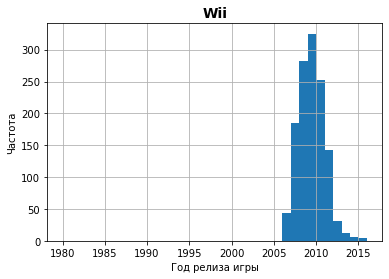

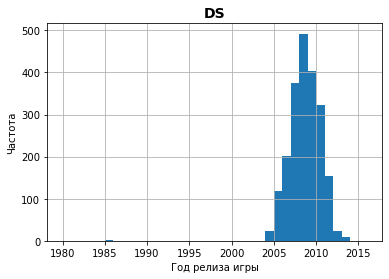

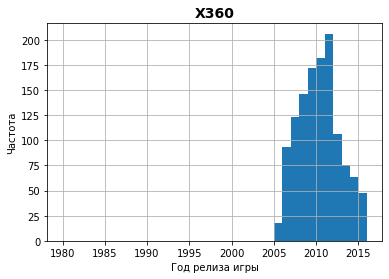

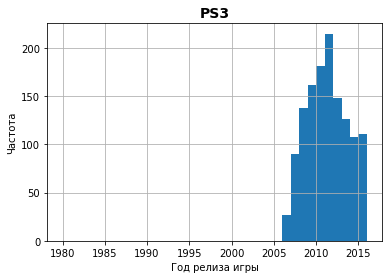

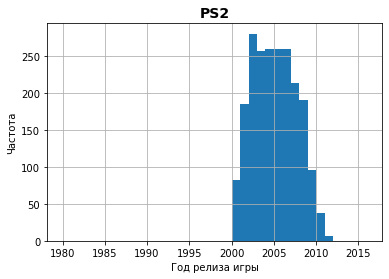

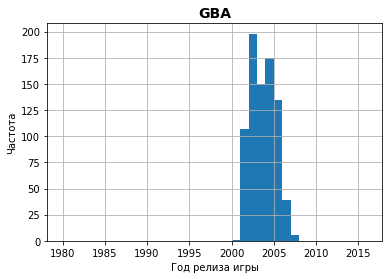

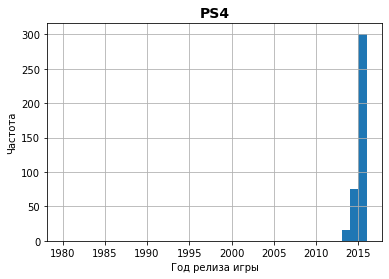

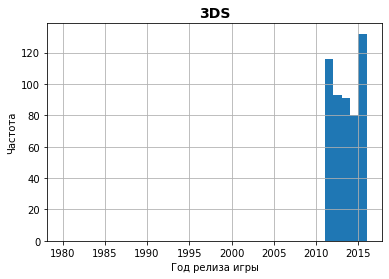

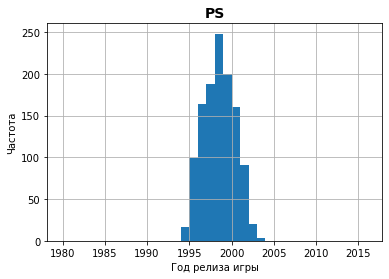

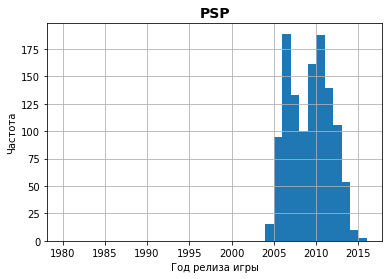

In [76]:
# цикл для построения гистограмм:

for j in range(0, len(platform_list)):
    change_platform_yaers[change_platform_yaers['platform']==platform_list[j]]\
    .plot(kind='hist', bins=years_list, legend=False, grid=True)
    
    plt.title(label=platform_list[j], fontsize=14, fontweight="bold")
    plt.xlabel("Год релиза игры")
    plt.ylabel("Частота")

Графики наглядно представляют поведение платформы за время ее существования, все ее взлеты и падения. Например по графику платформы PC видно, как с развитием технологий компьютеростроения развивалась и разработка видеоигр для пользователей. А некоторые платформы, такие как PSP PS GBA  и другие уже прекратили свое существование.  
На всех консольных платформах наблюдался резкий скачок продаж в начале и конце существования.

Каков же срок жизни платформы? Попробуем ответить на этот вопрос вычислив среднюю продолжительность жизни.

Для этого я решил использовать только те платформы, продажи по которым совершенно точно скатились к нулю. Увидеть это можно из частотных гистограмм, построенных для всех платформ из исходного датасета. Также лучше применить медиану для оценки продолжительности жизни, т.к. есть платформы "умершие" очень быстро, в течение одного двух лет.

C:\Users\zkdv03\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


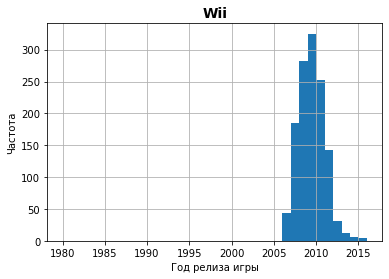

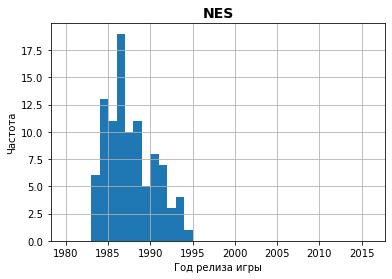

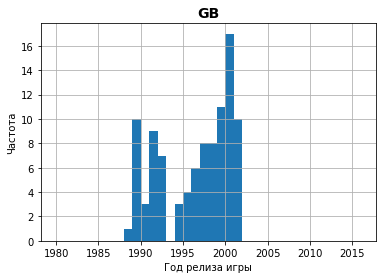

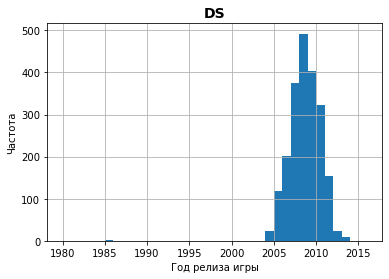

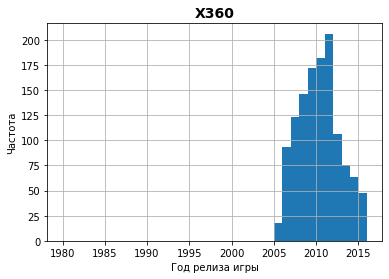

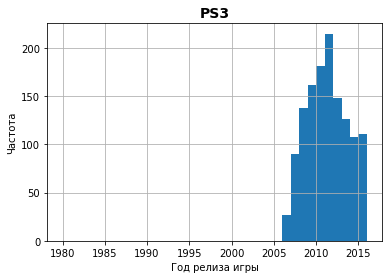

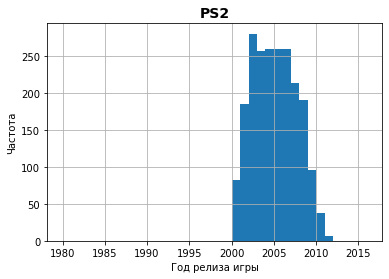

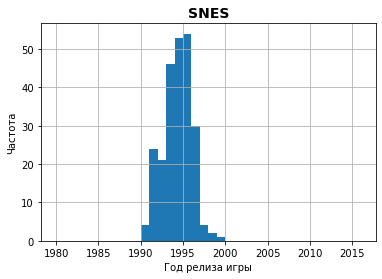

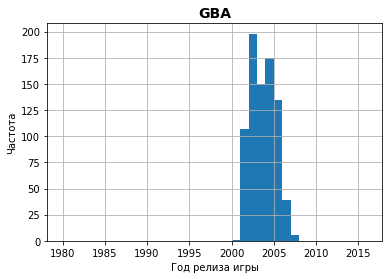

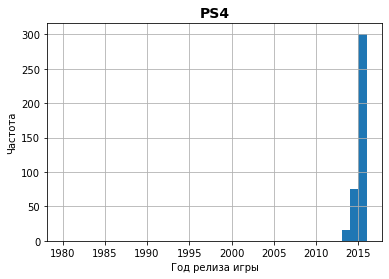

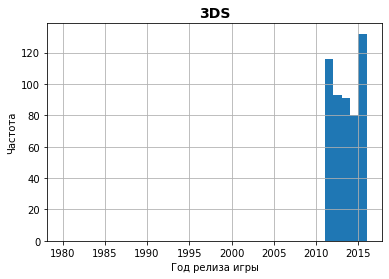

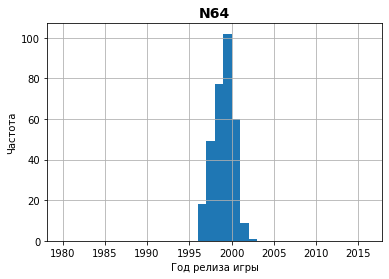

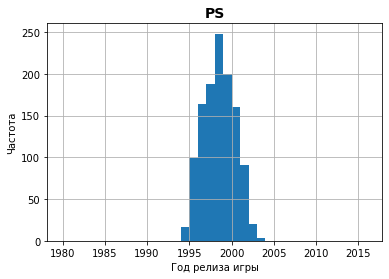

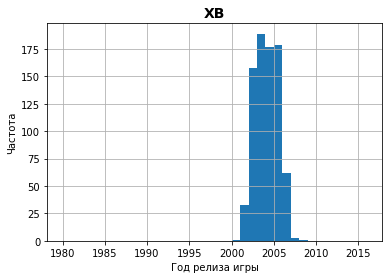

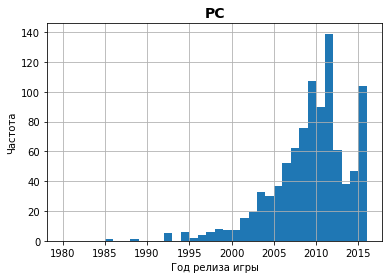

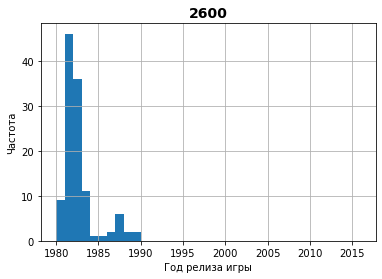

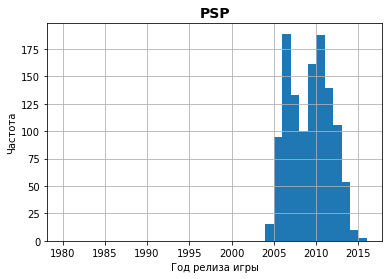

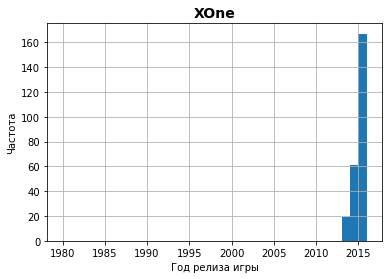

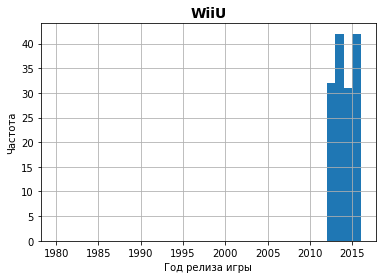

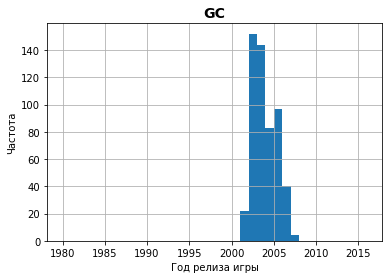

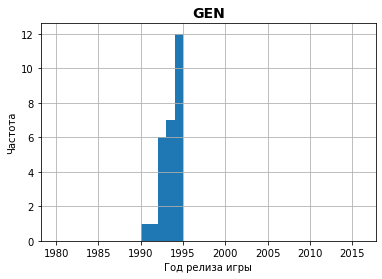

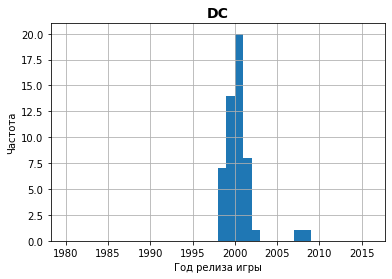

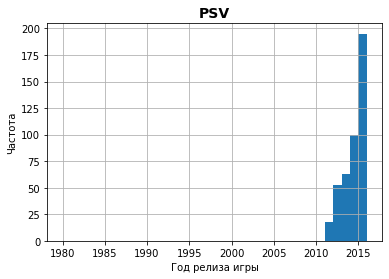

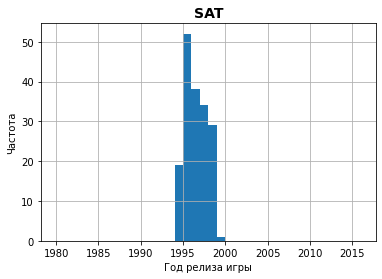

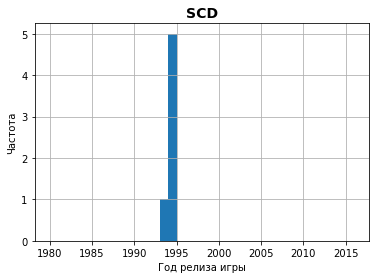

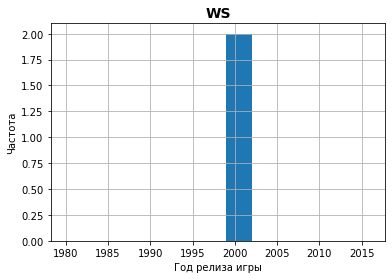

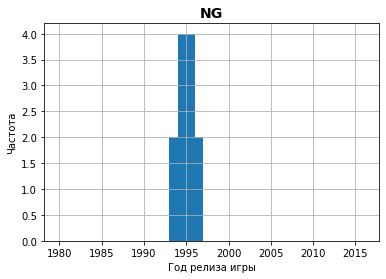

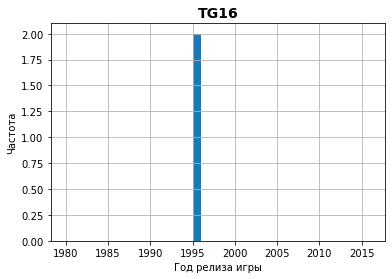

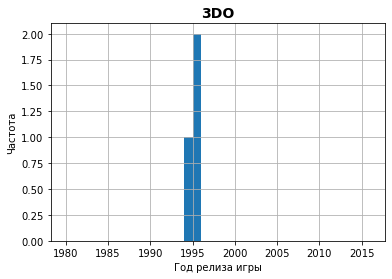

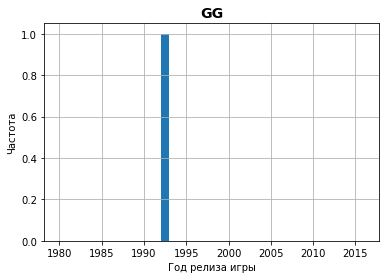

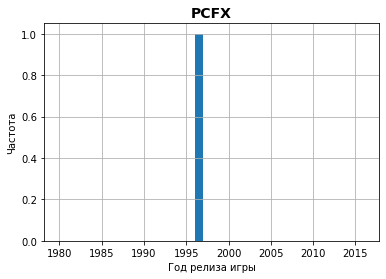

In [77]:
# строим гистограммы распределения продаж для всех платформ на основании исходного датафрейма

all_platform_list = df['platform'].unique()

for i in range(0, len(all_platform_list)):
    df[df['platform']==all_platform_list[i]]\
    .plot(kind='hist', bins=years_list, legend=False, grid=True)
    
    plt.title(label=all_platform_list[i], fontsize=14, fontweight="bold")
    plt.xlabel("Год релиза игры")
    plt.ylabel("Частота")

На основании графиков составим список, в который войдут те платформы, которое нужно исключить из данного анализа

In [78]:
# исключающий список, по которому будем фильтровать

platform_exclude = ['PC', 'X360', 'PS3', '3DS', 'PSV', 'WiiU', 'XOne', 'PS4']

In [79]:
# с помощью сводной таблицы вычислим разность между годом окончания существования платформы и началом
platform_lifetime = df.pivot_table(index='platform', values='year_of_release', aggfunc=[min, max])
platform_lifetime.columns = ['beginnig', 'end']
platform_lifetime['duration'] = platform_lifetime['end'] - platform_lifetime['beginnig']

# отфильтруем полученную таблицу по списку platform_exclude
platform_lifetime_filtred = (platform_lifetime
                     .reset_index()
                     .query('platform not in @platform_exclude')
                    )
platform_lifetime_filtred

,platform,beginnig,end,duration
0,2600,1980,1989,9
1,3DO,1994,1995,1
3,DC,1998,2008,10
4,DS,1985,2013,28
5,GB,1988,2001,13
6,GBA,2000,2007,7
7,GC,2001,2007,6
8,GEN,1990,1994,4
9,GG,1992,1992,0
10,N64,1996,2002,6


In [80]:
mean_lifetime = platform_lifetime_filtred['duration'].median()
mean_lifetime

7.0

Средний срок жизни платформы составляет 7 лет.

Чтобы определить тенденцию изменения продолжительности жизни платформ построим график, на котором отобразим линию тренда по продолжительности жизни.

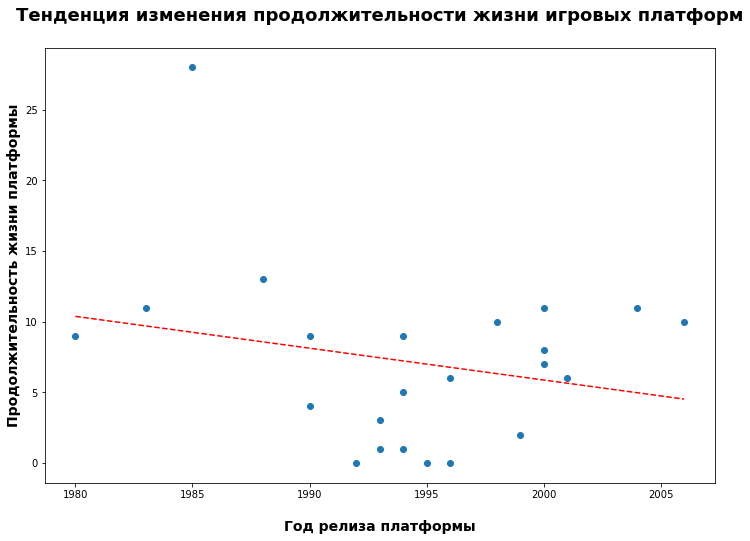

In [81]:
# отсортируем таблицу по годам появления на рынке платформ
# по оси X у нас будет год релиза платформы
# по оси Y продолжительность жизни платформы

platform_lifetime_x = platform_lifetime_filtred.sort_values(by='beginnig')['beginnig']
platform_lifetime_y = platform_lifetime_filtred.sort_values(by='beginnig')['duration']
plt.figure(figsize=(12,8))
plt.scatter(platform_lifetime_x, platform_lifetime_y)

# построим линию тренда
z = np.polyfit(platform_lifetime_x, platform_lifetime_y, 1)
p = np.poly1d(z)
plt.plot(platform_lifetime_x,p(platform_lifetime_x),"r--")

plt.title(label='Тенденция изменения продолжительности жизни игровых платформ\n', fontsize=18, fontweight="bold")
plt.xlabel("\nГод релиза платформы", fontsize=14, fontweight="bold")
plt.ylabel("Продолжительность жизни платформы", fontsize=14, fontweight="bold")


plt.show()

Как видим продолжительность жизни платформ снижается с течением времени.

Также посчитаем через сколько времени в среднем появляется новая платформа и посмотрим ни изменение этого параметра в расматриваемом промежутке времени.

In [82]:
# отсортируем сгруппированную по платформам исходную таблицу по столбцу beginnig по возрастанию

platform_lifetime_speedappear = platform_lifetime.sort_values(by='beginnig')
platform_lifetime_speedappear

,beginnig,end,duration
platform,,,
2600,1980,1989,9
NES,1983,1994,11
DS,1985,2013,28
PC,1985,2016,31
GB,1988,2001,13
SNES,1990,1999,9
GEN,1990,1994,4
GG,1992,1992,0
SCD,1993,1994,1


In [83]:
# значения столбца beginnig переведем в список, чтобы можно было двигаться по нему используя индексы элементов
list_year_begin = list(platform_lifetime_speedappear['beginnig'])

# создаем пустой список куда будет записываться разность в годах между релизами новых платформ
list_year_begin_dif = []

# вычисляем разность в цикле
for i in range(0, len(list_year_begin)-1):
    difference = list_year_begin[i+1] - list_year_begin[i]
    list_year_begin_dif.append(difference)

# добавим последним значением NaN чтобы можно было присоединить полученные значения к датафрейму platform_lifetime_speedappear
list_year_begin_dif.append(np.nan)

In [84]:
# добавляем полученные значения к датафрейму
platform_lifetime_speedappear['dif'] = list_year_begin_dif

# удаляем строку с пропуском чтобы можно было построить график
platform_lifetime_speedappear = platform_lifetime_speedappear.dropna()
platform_lifetime_speedappear

,beginnig,end,duration,dif
platform,,,,
2600,1980,1989,9,3.0
NES,1983,1994,11,2.0
DS,1985,2013,28,0.0
PC,1985,2016,31,3.0
GB,1988,2001,13,2.0
SNES,1990,1999,9,0.0
GEN,1990,1994,4,2.0
GG,1992,1992,0,1.0
SCD,1993,1994,1,0.0


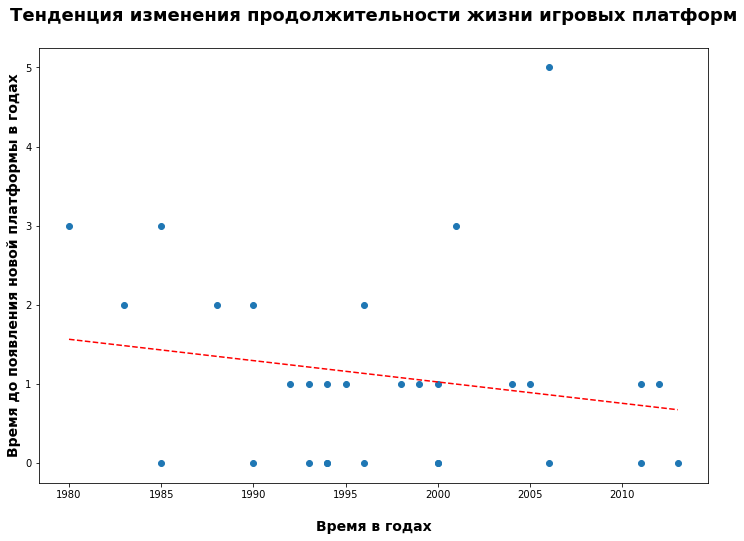

In [85]:
# определяем значения по осям
# по оси Х отложим время
# по Y полученную разность
# пострим точечный график рассеяния

speedappear_x = platform_lifetime_speedappear['beginnig']
speedappear_y = platform_lifetime_speedappear['dif']
plt.figure(figsize=(12,8))
plt.scatter(speedappear_x, speedappear_y)

# наложим на график рассеяия тренд
z = np.polyfit(speedappear_x, speedappear_y, 1)
p = np.poly1d(z)
plt.plot(speedappear_x,p(speedappear_x),"r--")

plt.title(label='Тенденция изменения продолжительности жизни игровых платформ\n', fontsize=18, fontweight="bold")
plt.xlabel("\nВремя в годах", fontsize=14, fontweight="bold")
plt.ylabel("Время до появления новой платформы в годах", fontsize=14, fontweight="bold")


plt.show()

In [86]:
platform_lifetime_speedappear['dif'].median()

1.0

Как видим тренд у нас отрицательный. Это означает, что время между появлениями новых платформ сокращается. Все быстрее и быстрее появляются новые платформы.

Среднее время появления новой платформы составляет 1 год

<a id='4.3'></a>

### 4.3 Потенциально прибыльные платформы

Для дальнейшего анализа выберем данные за последние несколько лет, т.к. они отражают последние тенденции и на их основании можно делать различные предположения о будущем поведении.

Актуальным периодом будем считать 2012 - 2016 года.

Сделаем срез данных по этому периоду.

In [87]:
relevant_years = []
for i in range(2012, 2017):
    relevant_years.append(i)

df_relevant = df.query('year_of_release in @relevant_years')
df_relevant

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01


Посмотрим какие платформы лидируют по суммарным продажам в этом периоде времени:

In [88]:
rel_platform_sales_sum = (df_relevant
                          .pivot_table(index='platform', values='total_sales', aggfunc=sum)
                          .sort_values(by='total_sales', ascending=False)
                         )
rel_platform_sales_sum

,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


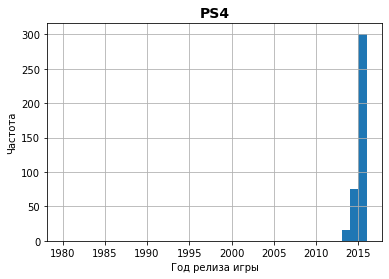

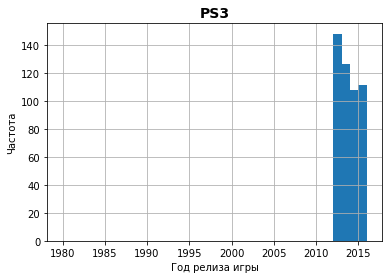

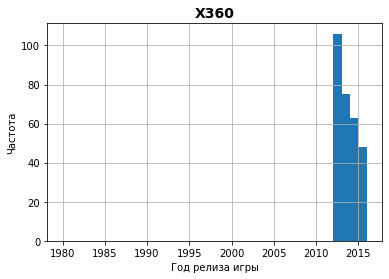

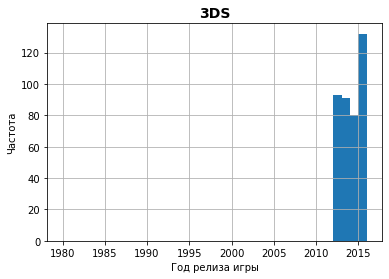

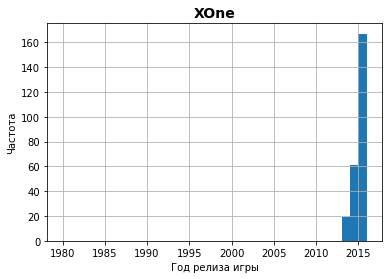

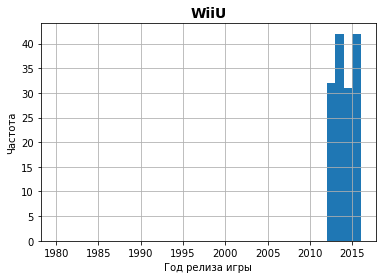

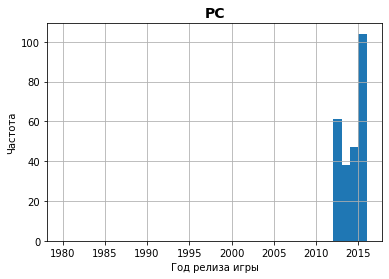

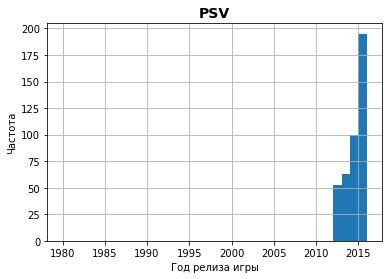

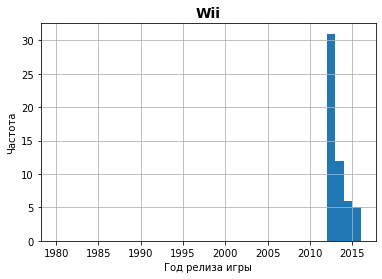

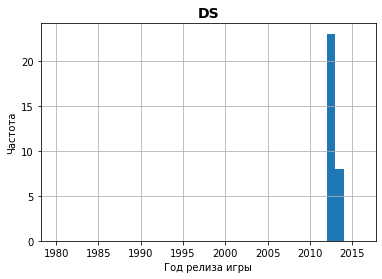

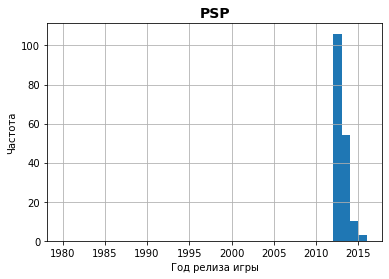

In [89]:
for j in range(0, len(rel_platform_sales_sum.index)):
    df_relevant[df_relevant['platform']==rel_platform_sales_sum.index[j]]\
    .plot(kind='hist', bins=years_list, legend=False, title=rel_platform_sales_sum.index[j], grid=True)
    
    plt.title(label=rel_platform_sales_sum.index[j], fontsize=14, fontweight="bold")
    plt.xlabel("Год релиза игры")
    plt.ylabel("Частота")

In [90]:
# посмотрим сколько было платформ в исходном датасете

len(df['platform'].unique())

31

В актуальном периоде, который мы выбрали, из 31 платформы остались только 11. Из этих 11 платформы DS и PSP можно исключить из потенциально прибыльных платформ, т.к. DS уже прекратила свое существование, а у PSP продажи практически равно нулю.  
Список потенциально прибыльных платформ в актуальном периоде выглядит так:

In [91]:
relevant_platforms = ['PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU', 'PC', 'PSV', 'Wii']

<a id='4.4'></a>

### 4.4 Диаграммы размаха по продажам игр<div align=right>[To top](#top)</div>

(0.0, 2.5)

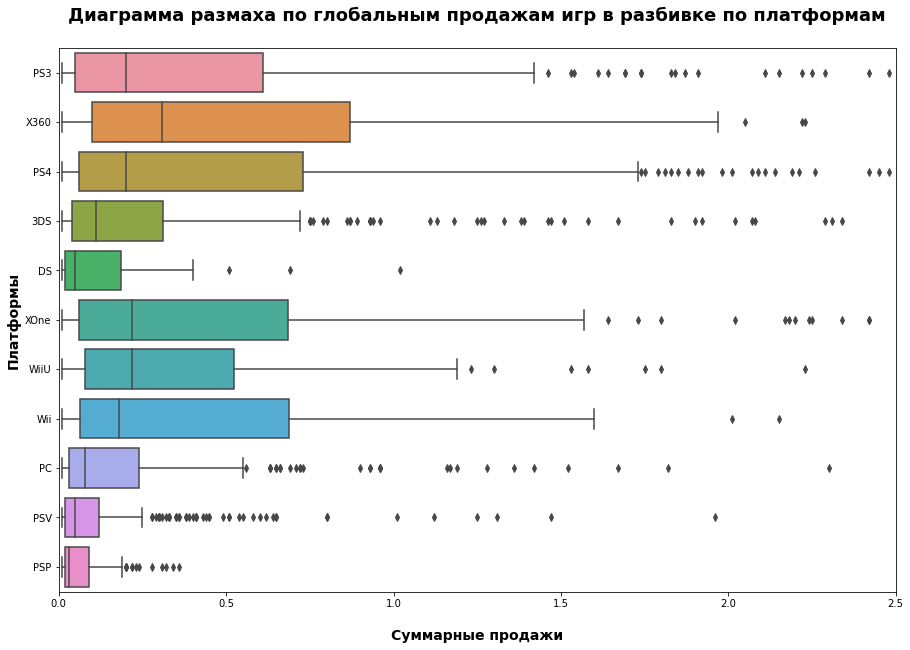

In [92]:
# построим все "ящики с усами" на одном графике для удобства
# используем библиотеку seaborn

plt.figure(figsize=(15,10))
sns.boxplot(data=df_relevant, x='total_sales', y='platform')

plt.title(label='Диаграмма размаха по глобальным продажам игр в разбивке по платформам\n', fontsize=18, fontweight="bold")
plt.xlabel("\nСуммарные продажи", fontsize=14, fontweight="bold")
plt.ylabel("Платформы", fontsize=14, fontweight="bold")
plt.xlim(0, 2.5)

По данным диаграммам легко определить была ли популярна платформа в интересующий нас отрезок времени. Определить можно по объему продаж, входящему в межквартильный размах и медианному значению, чем они выше тем популярнее платформа. Например PS4 или X360 несомненно популярны.

<a id='4.5'></a>

### 4.5 Зависимость продаж от оценок критиков и пользователей

Выберем несколько популярных и потенциально прибыльных платформ и посмотрим как продажи на этих платформах зависят от оценок игр.

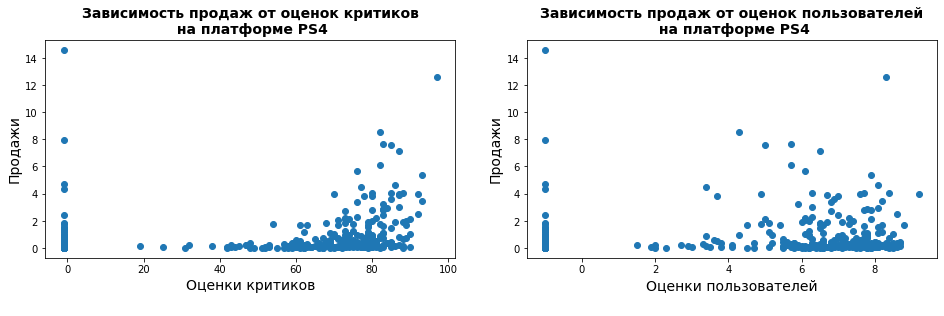

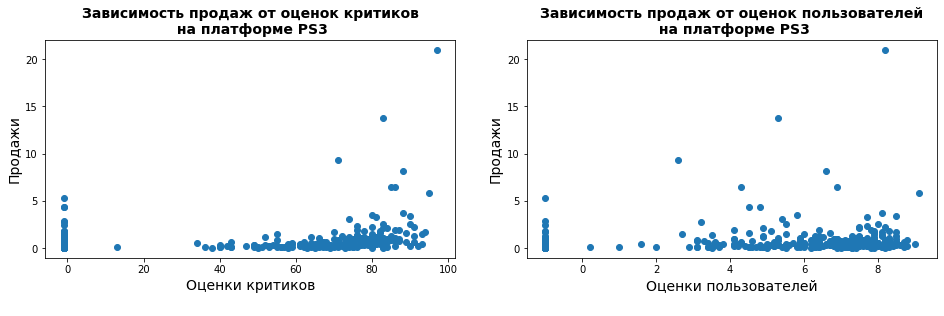

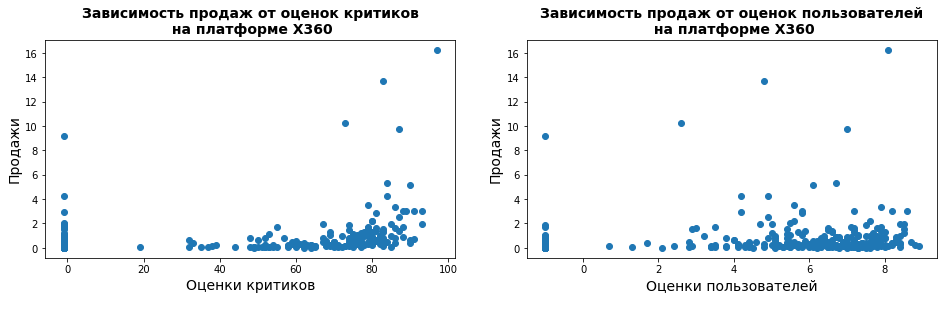

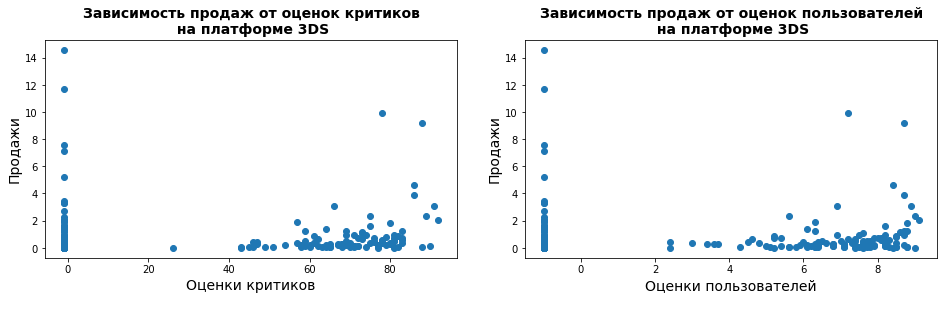

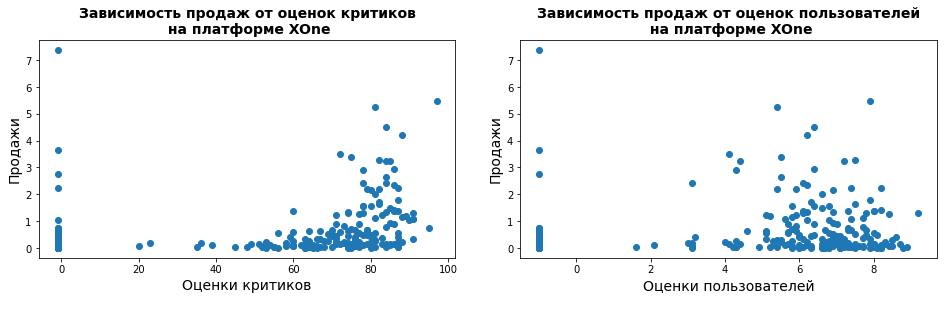

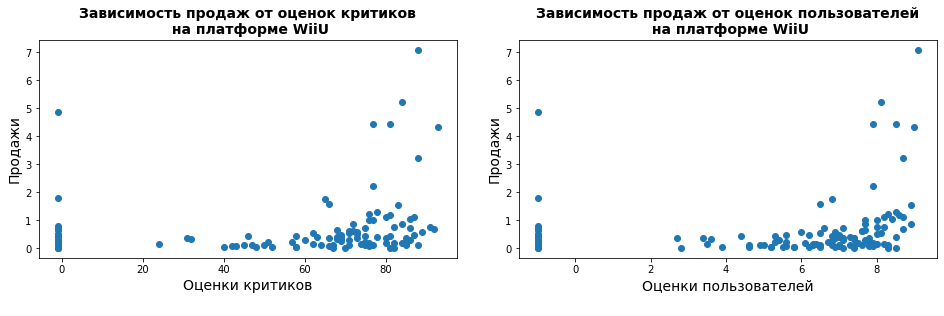

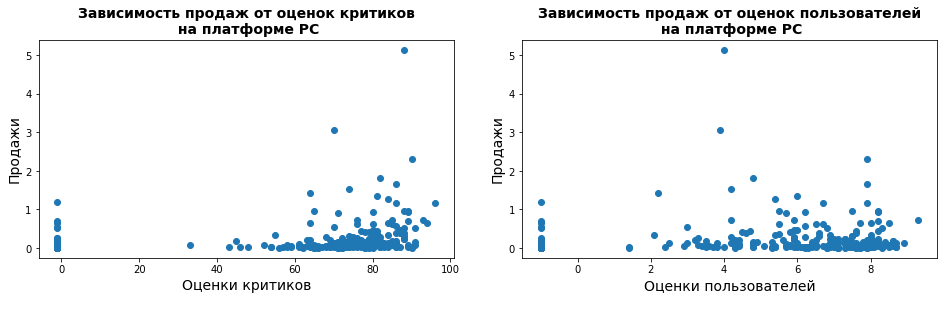

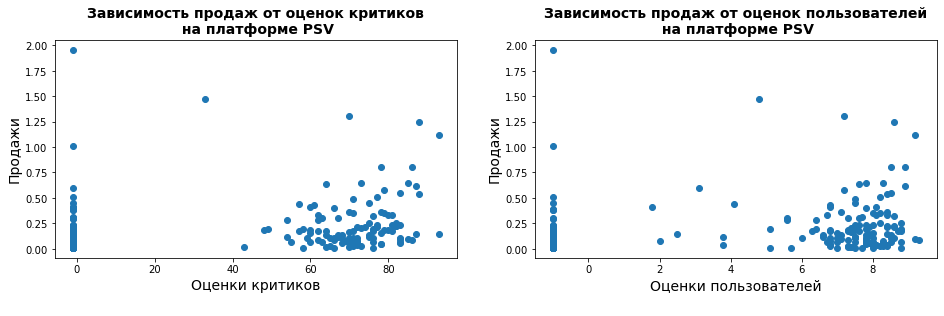

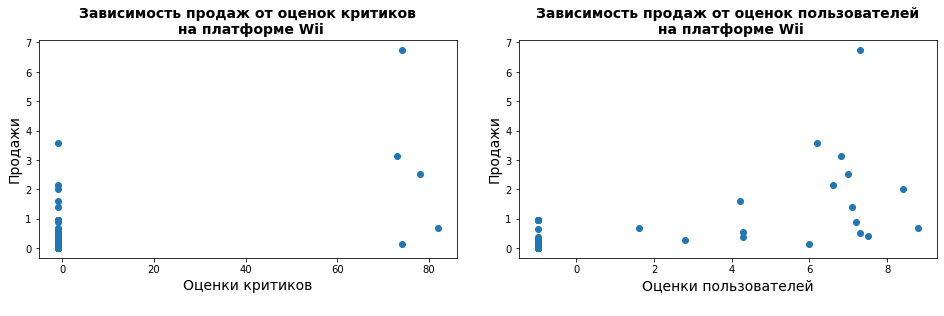

In [93]:
# используем цикл для построения диаграмм рассеяния
# диаграммы зависимости продаж от оценок критиков и пользователей расположим рядом слева и справа соответственно

for name_platform in relevant_platforms:
    x_critic = df_relevant[df_relevant['platform']==name_platform]['critic_score']
    y_critic = df_relevant[df_relevant['platform']==name_platform]['total_sales']
    
    x_user = df_relevant[df_relevant['platform']==name_platform]['user_score']
    y_user = df_relevant[df_relevant['platform']==name_platform]['total_sales']
    
    
    fig = plt.figure(figsize=(13.5, 4.5))
    
    ax1 = fig.add_subplot(121)
    ax1.scatter(x_critic, y_critic)
    ax1.set_title('Зависимость продаж от оценок критиков\n на платформе '+name_platform, fontsize=14, fontweight="bold")
    ax1.set_xlabel('Оценки критиков\n', fontsize=14)
    ax1.set_ylabel('Продажи', fontsize=14)
    
    ax2 = fig.add_subplot(122)
    ax2.scatter(x_user, y_user)
    ax2.set_title('Зависимость продаж от оценок пользователей\n на платформе '+name_platform, fontsize=14, fontweight="bold")
    ax2.set_xlabel('Оценки пользователей\n', fontsize=14)
    ax2.set_ylabel('Продажи', fontsize=14)
    
    plt.tight_layout(w_pad=3)

Также посчитаем коэффициент корреляции:

In [94]:
print('Коэффициент корреляции')
print()
print('{: <30}|{: <30}'.format('продажи и оценки критиков', 'продажи и оценки пользователей'))
print('_____________________________________________________________')
print()
for name_platform in relevant_platforms:
    print(name_platform)
    print()
    print('{: <30.2}{: <30.2}'.format(df_relevant[df_relevant['platform']==name_platform]['total_sales']\
                                   .corr(df_relevant[df_relevant['platform']==name_platform]['critic_score'])\
                                   
                                   , df_relevant[df_relevant['platform']==name_platform]['total_sales']\
                                   .corr(df_relevant[df_relevant['platform']==name_platform]['user_score'])))
    print('_____________________________________________________________')
    print()

Коэффициент корреляции

продажи и оценки критиков     |продажи и оценки пользователей
_____________________________________________________________

PS4

0.23                          0.12                          
_____________________________________________________________

PS3

0.3                           0.22                          
_____________________________________________________________

X360

0.26                          0.1                           
_____________________________________________________________

3DS

0.15                          0.13                          
_____________________________________________________________

XOne

0.27                          0.12                          
_____________________________________________________________

WiiU

0.3                           0.26                          
_____________________________________________________________

PC

0.2                           0.052                         
_________

Исходя из графиков расеяния можно сказать, что объем продаж довольно резко возрастает при оценке критиков от 60 и выше, до этой отметки продажи малы.  
Зависимость продаж от оценок пользователей менее выраженная, но можно сказать, что продажи растут начиная с отметок в 2-4 балла

В целом коэффициент корреляции показывает, что зависимость продаж от оценок критиков сильнее, чем от оценок пользователей. За исключением платформ WiiU и PSV, где коэффициент корреляции примерно одинаков.

<a id='4.6'></a>

### 4.6 Общее распределение игр по жанрам

Рассмотрим как распределяются игры в зависимости от жанра.

Сначала оценим количественное распределение по жанрам:

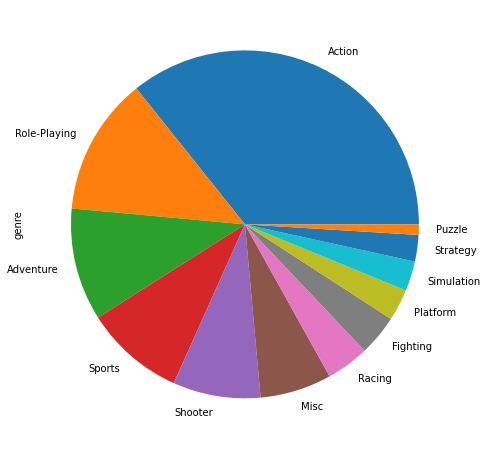

In [95]:
df_relevant['genre'].value_counts().plot(kind='pie', figsize=(8, 8), legend=False)

Жанр Action отрезал себе львиную долю пирога (наверное потому, что под action можно приписать любую динамичную игру, в том числе и shooter например), далее идут игры ролевые, приключения, спортивные и стрелялки. Наименьшее количество игр в жанре Puzzle (довольно специфичный вид игры, да и сюжетом не разгуляешся).

Посмотрим как распределяются продажи в зависимости от жанра игры:

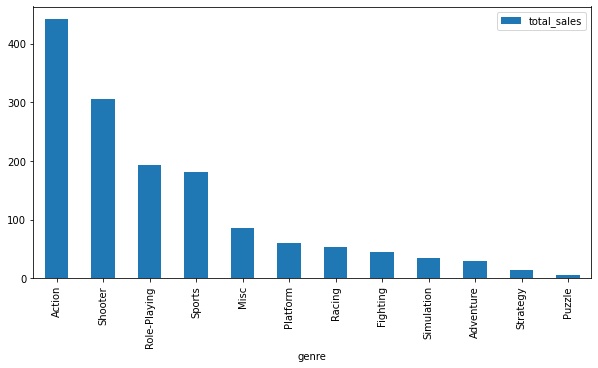

In [96]:
(df_relevant
                   .pivot_table(index='genre', aggfunc={'total_sales':sum})
                   .sort_values(by='total_sales', ascending=False)
                   .plot(y='total_sales', kind='bar', figsize=(10, 5))
)

В целом похожая картина. Жанр Action лидирует в продажах, далее шутеры, ролевые и спортивные. Однако игры жанра Adventure на этот раз в конце списка. Несмотря на то, что производят их довольно много продаются они крайне плохо по сравнение с остальными топовыми жанрами. Жанр Puzzle замыкает список, ожидаемо:)

<a id='5'></a>

## 5. Портрет пользователя

Составим портрет пользователя для каждого региона (NA, EA, JP)

<a id='5.1'></a>

### 5.1 ТОП-5 платформ

Для каждого региона посчитаем суммарные продажи по платформам и определим 5 самых популярных.

In [97]:
top5_platforms_per_region = (df_relevant
        .pivot_table(index='platform', aggfunc={'na_sales':sum, 'eu_sales':sum, 'jp_sales':sum})
       )
   
top5_platforms_per_region

,eu_sales,jp_sales,na_sales
platform,,,
3DS,42.64,87.79,55.31
DS,3.53,3.72,4.59
PC,37.76,0.00,19.12
PS3,106.86,35.29,103.38
PS4,141.09,15.96,108.74
PSP,0.42,10.47,0.13
PSV,11.36,21.04,10.98
Wii,11.92,3.39,17.45
WiiU,25.13,13.01,38.10


Построим графики распределения продаж по платформам оставив самые популярные:

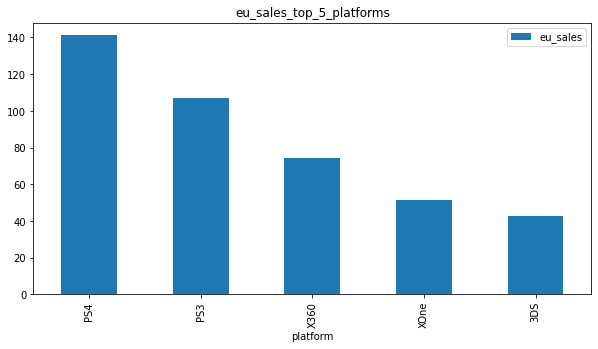

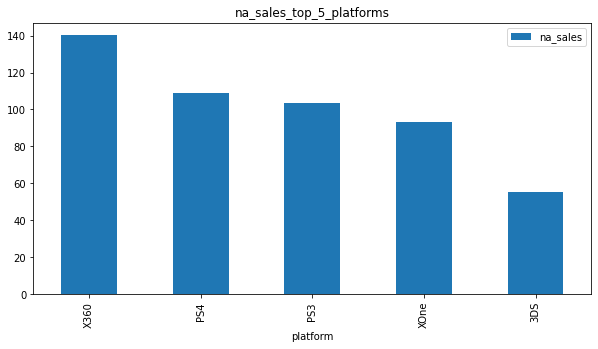

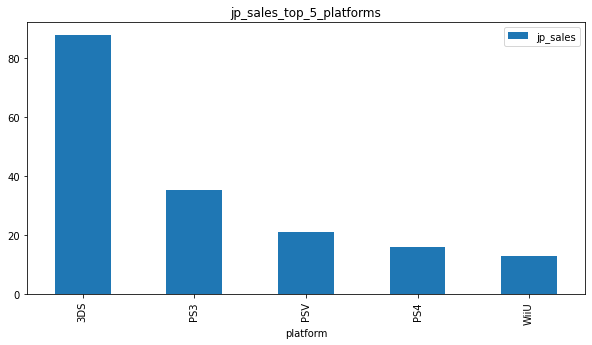

In [98]:
# список регионов для цикла
region = ['eu_sales', 'na_sales', 'jp_sales']

for i in range(0, 3):
    (top5_platforms_per_region
     .nlargest(5, columns=region[i])
     .plot(y=region[i], kind='bar', figsize=(10, 5), title=region[i]+'_top_5_platforms')
    )

В Европе самая популярная платформа PS4, в Северной Америке X360, в Японии - Nintendo 3DS. Американцы и японцы поддерживают своих производителей.

<a id='5.2'></a>

### 5.2 ТОП-5 жанров

Для каждого региона посчитаем суммарные продажи по жанрам и определим 5 самых популярных.

In [99]:
top5_genre_per_region = (df_relevant
        .pivot_table(index='genre', aggfunc={'na_sales':sum, 'eu_sales':sum, 'jp_sales':sum})
       )
   
top5_genre_per_region

,eu_sales,jp_sales,na_sales
genre,,,
Action,159.34,52.80,177.84
Adventure,9.46,8.24,8.92
Fighting,10.79,9.44,19.79
Misc,26.32,12.86,38.19
Platform,21.41,8.63,25.38
Puzzle,1.40,2.14,1.13
Racing,27.29,2.50,17.22
Role-Playing,48.53,65.44,64.00
Shooter,113.47,9.23,144.77


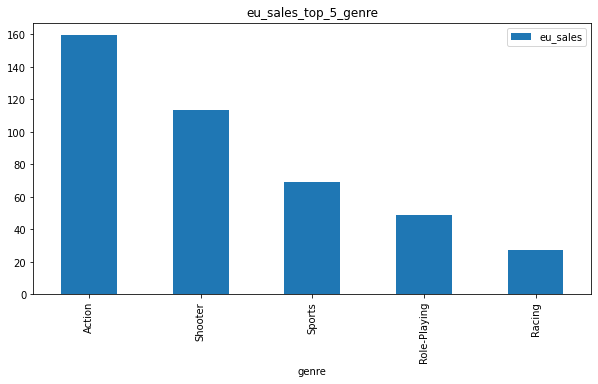

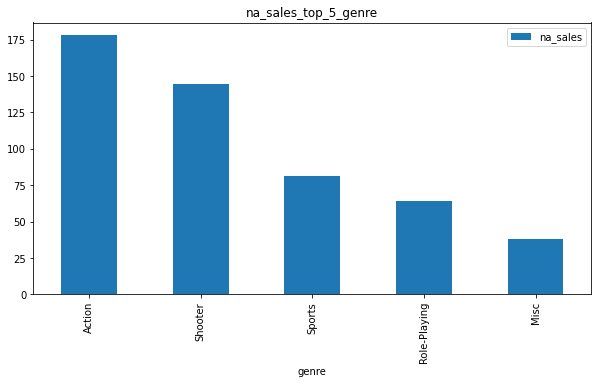

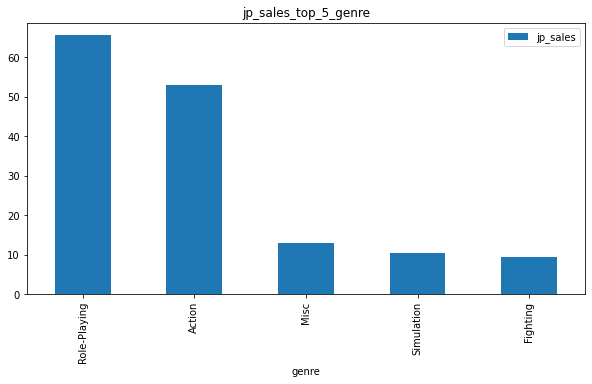

In [100]:
for i in range(0, 3):
    (top5_genre_per_region
     .nlargest(5, columns=region[i])
     .plot(y=region[i], kind='bar', figsize=(10, 5), title=region[i]+'_top_5_genre')
    )

Пользователи Европы и Северной Америки практически идентичны, за исключением последнего жанра: в Европе это гонки, а в Северной Америке - аркады. Пользователи Японии как ввсегда особенные, предпочитают ролевые игры (все таки я в душе японец), но также разделяют любовь жителей запада к жанру Action. В Японии жанры Role и Action лидеры в продажах с большим и резким отрывом от остальных жанров.

<a id='5.3'></a>

### 5.3 Рейтинг ESRB

Аналогично посмотрим как влияет рейтинг на продажи в каждом регионе.

In [101]:
rating_sum = df_relevant.pivot_table(index='rating', aggfunc={'na_sales':sum, 'eu_sales':sum, 'jp_sales':sum})
  
rating_sum

,eu_sales,jp_sales,na_sales
rating,,,
E,113.03,28.33,114.37
E10+,55.37,8.19,75.70
M,193.96,21.20,231.57
T,52.96,26.02,66.02
unknown,91.50,108.84,103.31


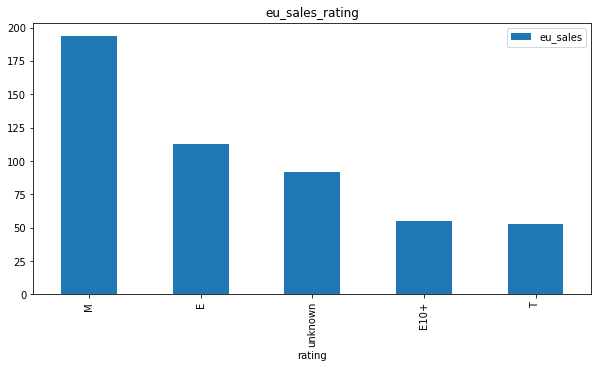

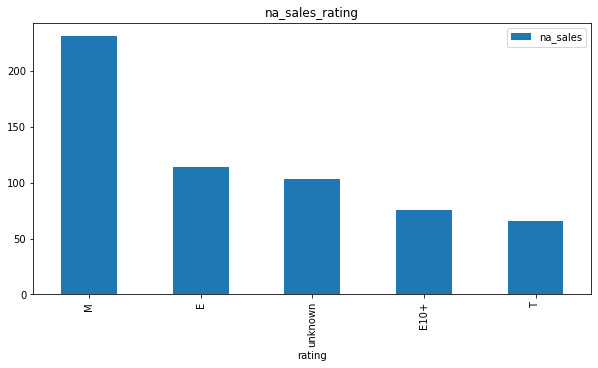

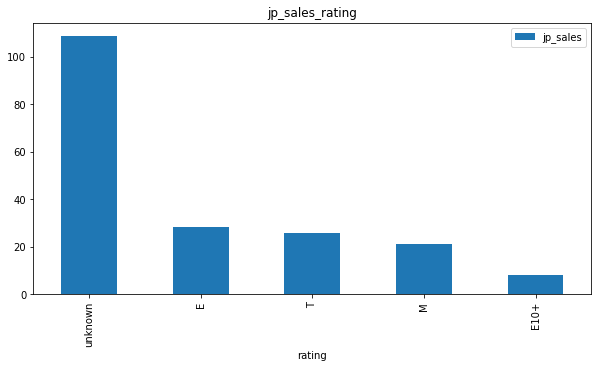

In [102]:
for i in range(0, 3):
    (rating_sum
     .sort_values(by=region[i], ascending=False)
     .plot(y=region[i], kind='bar', figsize=(10, 5), title=region[i]+'_rating')
    )

В Америке и Европе идентичное распределение продаж в зависимости от рейтингов: преобладают, с большим отрывом, игры для взрослых, далее игры для всех, на третьем месте игры с неизвестным рейтингом и замыкают игры 13+.  
В Японии все опять не так: лидируют игры с неизвестным рейтингом с большим отрывом, меньше всего популярны игры 10+.

В целом можно сказать, что американцы и европейцы схожи в выборе платформ, жанров и возрастного рейтинга игр. Т.е. портреты пользователей идентичны.  
Японцы сильно отличаются в предпочтениях от западных игроков, в некоторых случаях диаметрально. Я думаю это связанно с тем, что Япония страна консервативная в плане традиций и культуры и рассовое смешение там меньшее, чем в остальных областях планеты. Поэтому так хорошо и четко просматриваются различия в предпочтениях.

<a id='6'></a>

## 6. Проверка гипотез

**Первая гипотеза**

Первая гипотеза которую нужно проверить - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Сформулируем нулевую и альтернативную гипотезы:
* H0 - средние пользовательские рейтинги платформ Xbox One и PC равны (в H0 всегда используется знак равенства);
* H1 - средний пользовательский рейтинг платформы Xbox One отличается от среднего пользовательского рейтинга платформы PC .

Альтернативная гипотеза у нас двусторонняя, т.к. средний рейтинг может отличаться от как в большую так и в меньшую сторону.

Чтобы проверить гипотезу о равенстве средних двух выборок применим метод scipy.stats.ttest_ind (array1, array2, equal_var), где equal_var - параметр, задающий считать ли равными дисперсии выборок. Передаётся как "equal_var = True" или "equal_var = False" (True — считать, False — не считать).

In [103]:
# удалим из выборки отрицательные значения, которыми ранее заменили пропуски
# чтобы они не влияли на распределения
xbox_one_ttest = df_relevant[(df_relevant['platform']=='XOne')&(df_relevant['user_score'] >= 0)]['user_score']
pc_ttest = df_relevant[(df_relevant['platform']=='PC')&(df_relevant['user_score'] >= 0)]['user_score']

# проверим дисперсии рассматриваемых выборок
xbox_one_ttest_var = np.var(xbox_one_ttest, ddof=1)
pc_ttest_var = np.var(pc_ttest, ddof=1)

print('Дисперсия платформы Xbox One:', round(xbox_one_ttest_var, 2))
print()
print('Дисперсия платформы PC:', round(pc_ttest_var, 2))

Дисперсия платформы Xbox One: 1.91

Дисперсия платформы PC: 2.77


Разница между дисперсиями выборок составляет 0,86, что при данном уровне дисперсии довольно большая разница и считать дисперсии выборок равными нельзя, поэтому зададим аргумент equal_var=False.

In [104]:
# уровень значимости 5%
alpha = 0.05

results = st.ttest_ind(xbox_one_ttest, pc_ttest, equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


р-уровень значимости составил почти 55%, что значительно выше 5% => средний рейтинг платформ Xbox One и PC статистически значимо не отличается.

**Вторая гипотеза**

Вторая гипотеза для проверки звучит так - средние пользовательские рейтинги жанров Action и Sports разные.

* H0 - средние пользовательские рейтинги жанров Action и Sports равны (в H0 всегда используется знак равенства);
* H1 - средние пользовательские рейтинги жанров Action и Sports различаются.

В этой гипотезе нам также нужно сравнить средние двух выборок, поэтому применим тот же тест ttest_ind.

In [105]:
# удалим из выборки отрицательные значения, которыми ранее заменили пропуски
# чтобы они не влияли на распределения

action_ttest = df_relevant[(df_relevant['genre']=='Action')&(df_relevant['user_score'] >= 0)]['user_score']
sports_ttest = df_relevant[(df_relevant['genre']=='Sports')&(df_relevant['user_score'] >= 0)]['user_score']

# проверим дисперсии рассматриваемых выборок
action_ttest_var = np.var(action_ttest, ddof=1)
sports_ttest_var = np.var(sports_ttest, ddof=1)

print('Дисперсия жанра Action:', round(action_ttest_var, 2))
print()
print('Дисперсия жанра Sports:', round(sports_ttest_var, 2))

Дисперсия жанра Action: 1.89

Дисперсия жанра Sports: 3.02


Разница между дисперсиями выборок составляет 1,13, что при данном уровне дисперсии довольно большая разница и считать дисперсии выборок равными нельзя, поэтому зададим аргумент equal_var=False.

In [106]:
# уровень значимости зададим равным 5%
alpha = 0.05

results = st.ttest_ind(action_ttest, sports_ttest, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


p-уровень значимости слишком мал, гораздо меньше определенного нами порогового значения в 5% => средние пользовательские рейтинги жанров Action и Sports статистически значимо различаются.

<a id='7'></a>

## 7. Вывод

Проведя исследовательский анализ данных о продажах видеоигр в мире можно сказать следующее:
 * В первую очередь следует обратить внимание на потенциально прибыльные игровые платформы. Таковыми являются 'PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU', 'PC', 'PSV', 'Wii'. Продажи по платформам 'PS3', 'X360', 'Wii' падают, но все еще могут принести некоторую прибыль. Нужно иметь ввиду что в разных регионах популярные платформы могут отличаться, например платформа 3DS очень популярна в Японии, но менее популярна в Европе и Америке. Платформы 3DS, PS3, PS4 популярны во всех регионах.
 * Среди жанров видеоигр также можно выделить наиболее популярные и перспективные, например жанр Action перспективный во всех регионах, а также жанры Shooter, Sports и Role-Playing являются потенциально прибыльными и следует учесть это при планировании. Следует быть аккуратными с таким жанром как Adventure. Несмотря на то, что игры с таким жанром занимают серьезную долю рынка в количественном отношении, их продажи очень невысоки.
 * К сожелению очень многие игры не имеют рейтинга ESRB, поэтому данные анализа здесь не совсем полные и корректные. Но даже сейчас можно сказать, что среди игроков Европы и Северной Америки наибеолее популярны игры для взрослых и для любого возраста. В то время как в Японии с большим отрывом лидируют игры, для которых рейтинг неустановлен.
 * Большое влияние на продажи игр оказывают их оценки. Оценки делятся на оценки критиков и пользователей. Мы выявили, что оценки критиков имеют в два раза более тесную связь с продажами, чем оценки пользователей. Поэтому стоит учитывать только оценки критиков. При этом нами была выявлена закономерность: продажи видеоигр начинают активно расти при оценки критиков от 60 пунктов и выше.
 * В целом пользователи из регионов Европа и Северная Америка очень схожи в своих предпочтених и можно объеденить усилия и рекламный контент для этих направлений. Но необходимо более тщательно подготовить компанию в Японии.
 * Рекомендация сосредоточить все силы на Европе и Севепной Америке. Но если ресурсы нашей компании очень большие, то подключить и азиатский регион, возможно лучше нанять человека инсайдера, живущего в непосредственно в Японии для консультаций.